### Instalação das Bibliotecas

```
pip install plotly --upgrade
pip install pandas 
pip install numpy
python -m pip install -U matplotlib
pip install seaborn
pip3 install statsmodels
```


In [106]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import normaltest,pearsonr,shapiro,f_oneway
from statsmodels.stats.multicomp import MultiComparison
from scipy import stats
import matplotlib.pyplot as plt
import pickle
import plotly.express as px
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold,cross_val_score
import math
from IPython.display import Markdown, display
from sklearn.model_selection import train_test_split

# 2. Coleta de Dados

### leitura dos dados dat263x-lab01.csv

In [2]:
df_dat_lab = pd.read_csv('database/dat263x-lab01.csv')
df_dat_lab

,PatientID,Pregnancies,PlasmaGlucose,DiastolicBloodPressure,TricepsThickness,SerumInsulin,BMI,DiabetesPedigree,Age,Diabetic
0,1354778,0,171,80,34,23,43.509726,1.213191,21,0
1,1147438,8,92,93,47,36,21.240576,0.158365,23,0
2,1640031,7,115,47,52,35,41.511523,0.079019,23,0
3,1883350,9,103,78,25,304,29.582192,1.282870,43,1
4,1424119,1,85,59,27,35,42.604536,0.549542,22,0
...,...,...,...,...,...,...,...,...,...,...
14995,1490300,10,65,60,46,177,33.512468,0.148327,41,1
14996,1744410,2,73,66,27,168,30.132636,0.862252,38,1
14997,1742742,0,93,89,43,57,18.690683,0.427049,24,0
14998,1099353,0,132,98,18,161,19.791645,0.302257,23,0


### Leitura dos dados PimaIndians.csv

In [3]:
dfPimaIndia = pd.read_csv('database/PimaIndians.csv')
dfPimaIndia

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


## 2.1. Descrição de dados

In [4]:
dfPimaIndia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
df_dat_lab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   PatientID               15000 non-null  int64  
 1   Pregnancies             15000 non-null  int64  
 2   PlasmaGlucose           15000 non-null  int64  
 3   DiastolicBloodPressure  15000 non-null  int64  
 4   TricepsThickness        15000 non-null  int64  
 5   SerumInsulin            15000 non-null  int64  
 6   BMI                     15000 non-null  float64
 7   DiabetesPedigree        15000 non-null  float64
 8   Age                     15000 non-null  int64  
 9   Diabetic                15000 non-null  int64  
dtypes: float64(2), int64(8)
memory usage: 1.1 MB


# 3. Processamento/Tratamento de Dados

In [6]:
del df_dat_lab['PatientID'] # Excluido a coluna PatientID
df_dat_lab.describe()

,Pregnancies,PlasmaGlucose,DiastolicBloodPressure,TricepsThickness,SerumInsulin,BMI,DiabetesPedigree,Age,Diabetic
count,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,3.224533,107.856867,71.220667,28.814000,137.852133,31.509646,0.398968,30.137733,0.333333
std,3.391020,31.981975,16.758716,14.555716,133.068252,9.759000,0.377944,12.089703,0.471420
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200512,0.078044,21.000000,0.000000
25%,0.000000,84.000000,58.000000,15.000000,39.000000,21.259887,0.137743,22.000000,0.000000
50%,2.000000,104.000000,72.000000,31.000000,83.000000,31.767940,0.200297,24.000000,0.000000
75%,6.000000,129.000000,85.000000,41.000000,195.000000,39.259692,0.616285,35.000000,1.000000
max,14.000000,192.000000,117.000000,93.000000,799.000000,56.034628,2.301594,77.000000,1.000000


In [7]:
dfPimaIndia.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## 3.5 A junção das Tabelas 

### 3.5.1 renomeando os rotulos da tabela dfPimaIndia

In [8]:
dfPimaIndia.rename(columns={
    'Glucose': 'PlasmaGlucose',
    'BloodPressure':'DiastolicBloodPressure',
    'SkinThickness':'TricepsThickness',
    'Insulin':'SerumInsulin',
    'DiabetesPedigreeFunction':'DiabetesPedigree',
    'Outcome':'Diabetic'
}, inplace = True)

In [9]:
dfPimaIndia.columns

Index(['Pregnancies', 'PlasmaGlucose', 'DiastolicBloodPressure',
       'TricepsThickness', 'SerumInsulin', 'BMI', 'DiabetesPedigree', 'Age',
       'Diabetic'],
      dtype='object')

In [10]:
df_diabetes = pd.merge(df_dat_lab,dfPimaIndia, how = 'outer')

In [11]:
df_diabetes.describe()

,Pregnancies,PlasmaGlucose,DiastolicBloodPressure,TricepsThickness,SerumInsulin,BMI,DiabetesPedigree,Age,Diabetic
count,15768.000000,15768.000000,15768.000000,15768.000000,15768.000000,15768.000000,15768.000000,15768.000000,15768.000000
mean,3.254756,108.491882,71.117643,28.410832,135.024607,31.533168,0.402519,30.288876,0.334094
std,3.392503,32.103413,16.899902,14.734410,132.841602,9.676452,0.376125,12.091964,0.471688
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,0.000000,85.000000,58.000000,15.000000,37.000000,21.348647,0.140140,22.000000,0.000000
50%,2.000000,105.000000,72.000000,30.000000,82.000000,31.799983,0.209146,24.000000,0.000000
75%,6.000000,130.000000,85.000000,41.000000,193.000000,39.135492,0.616693,35.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


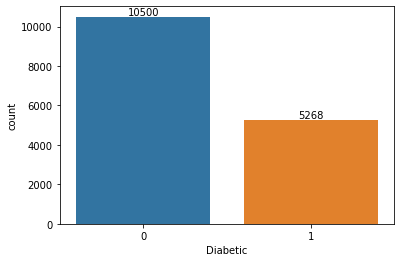

In [12]:
ax = sns.countplot(x = df_diabetes['Diabetic'], order=df_diabetes['Diabetic'].value_counts(ascending=False).index);
abs_values = df_diabetes['Diabetic'].value_counts(ascending=False).values;
ax.bar_label(container=ax.containers[0], labels=abs_values);

In [13]:
np.unique(df_diabetes['Diabetic'], return_counts=True)

(array([0, 1]), array([10500,  5268]))

In [14]:
df_diabetes.isnull().sum()

Pregnancies               0
PlasmaGlucose             0
DiastolicBloodPressure    0
TricepsThickness          0
SerumInsulin              0
BMI                       0
DiabetesPedigree          0
Age                       0
Diabetic                  0
dtype: int64

## 3.6. Visualizando o escalonamento dos atributos

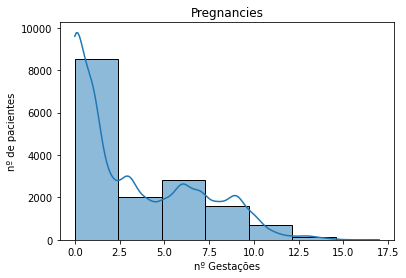

In [15]:
plt.title('Pregnancies')
plt.xlabel('nº Gestações')
plt.ylabel('nº de pacientes')
sns.histplot(df_diabetes,x='Pregnancies',kde=True,bins=7);

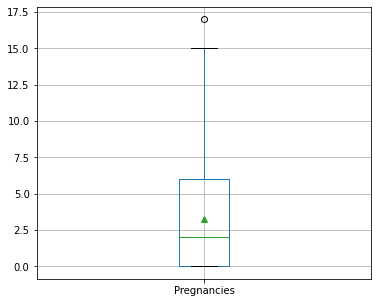

In [16]:
df_diabetes.boxplot(column=['Pregnancies'],figsize=(6,5),showmeans=True,grid=True);

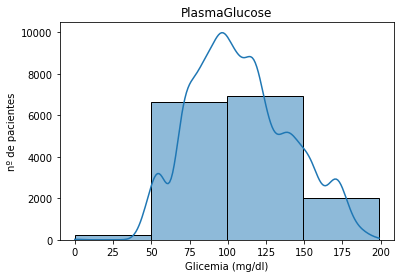

In [17]:
plt.title('PlasmaGlucose')
plt.xlabel('Glicemia (mg/dl)')
plt.ylabel('nº de pacientes')
sns.histplot(df_diabetes,x='PlasmaGlucose',kde=True, bins=4);


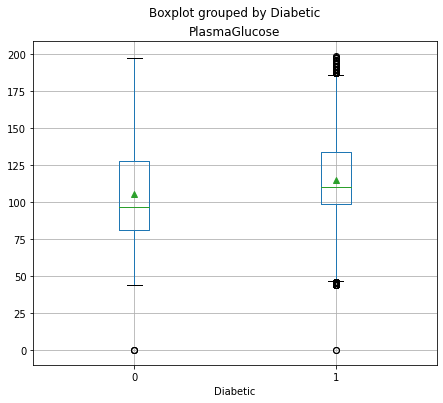

In [18]:
df_diabetes.boxplot(column=['PlasmaGlucose'],by="Diabetic",figsize=(7,6),showmeans=True,grid=True);

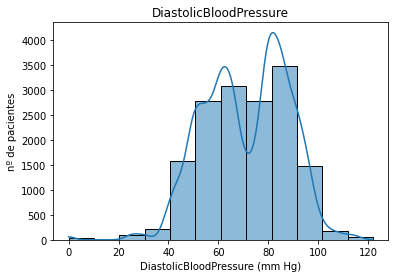

In [19]:
plt.title('DiastolicBloodPressure')
plt.xlabel('DiastolicBloodPressure (mm Hg)')
plt.ylabel('nº de pacientes')
sns.histplot(df_diabetes,x='DiastolicBloodPressure',kde=True,stat='count',bins=12);

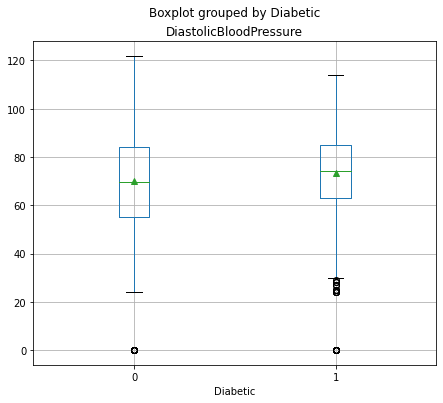

In [20]:
df_diabetes.boxplot(column=['DiastolicBloodPressure'],by="Diabetic",figsize=(7,6),showmeans=True);

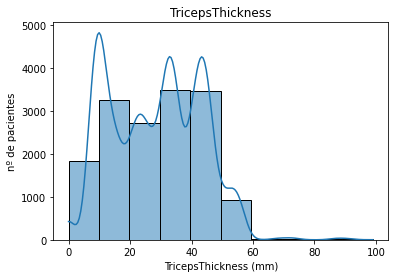

In [21]:
plt.title('TricepsThickness')
plt.xlabel('TricepsThickness (mm)')
plt.ylabel('nº de pacientes')
sns.histplot(df_diabetes,x='TricepsThickness',kde=True,stat='count',bins=10);

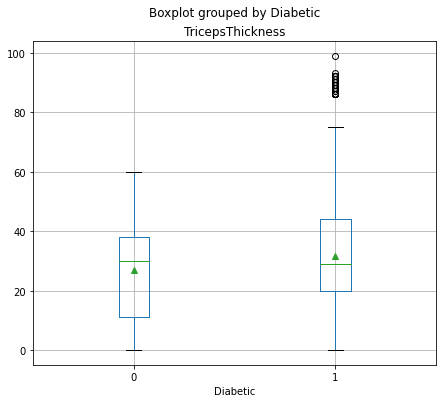

In [22]:
df_diabetes.boxplot(column=['TricepsThickness'],by="Diabetic",figsize=(7,6),showmeans=True);

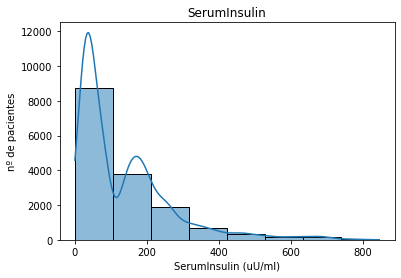

In [23]:
plt.title('SerumInsulin')
plt.xlabel('SerumInsulin (uU/ml)')
plt.ylabel('nº de pacientes')
sns.histplot(df_diabetes,x='SerumInsulin',kde=True,stat='count',bins=8);

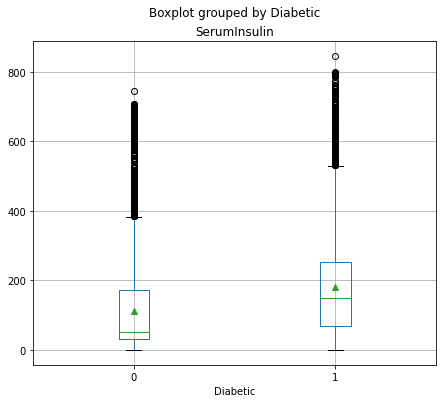

In [24]:
df_diabetes.boxplot(column=['SerumInsulin'],by="Diabetic",figsize=(7,6),showmeans=True);

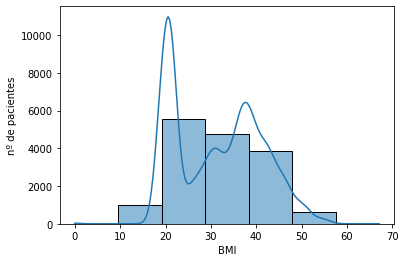

In [25]:
plt.xlabel('BMI')
plt.ylabel('nº de pacientes')
sns.histplot(df_diabetes,x='BMI',kde=True,stat='count',bins=7);

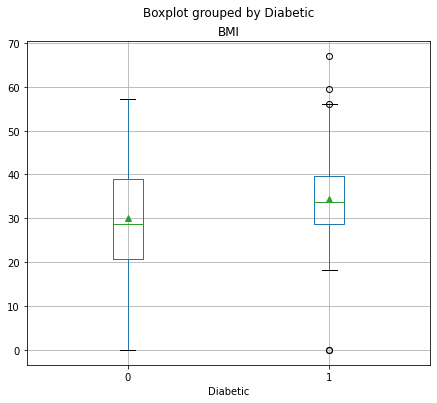

In [26]:
df_diabetes.boxplot(column=['BMI'],by="Diabetic",figsize=(7,6),showmeans=True);

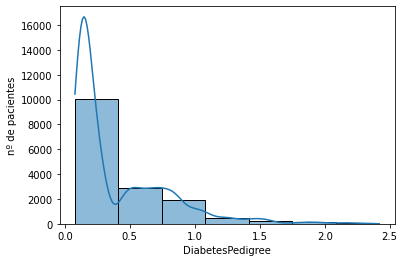

In [27]:
plt.xlabel('DiabetesPedigree')
plt.ylabel('nº de pacientes')
sns.histplot(df_diabetes,x='DiabetesPedigree',kde=True,stat='count',bins=7);

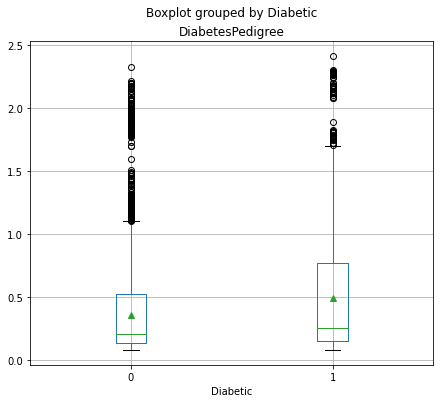

In [28]:
df_diabetes.boxplot(column=['DiabetesPedigree'],by="Diabetic",showmeans=True,figsize=(7,6));

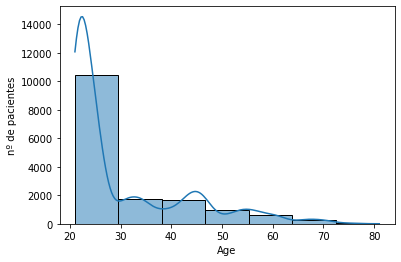

In [29]:
plt.xlabel('Age')
plt.ylabel('nº de pacientes')
sns.histplot(df_diabetes,x='Age',kde=True,stat='count',bins=7);

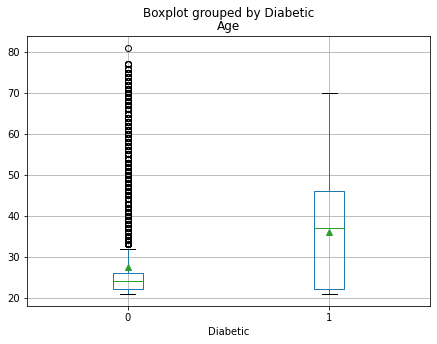

In [30]:
df_diabetes.boxplot(column=['Age'],by="Diabetic",showmeans=True,figsize=(7,5));

## 3.7. Removendo outlier

In [31]:
df_diabetes.columns

Index(['Pregnancies', 'PlasmaGlucose', 'DiastolicBloodPressure',
       'TricepsThickness', 'SerumInsulin', 'BMI', 'DiabetesPedigree', 'Age',
       'Diabetic'],
      dtype='object')

In [32]:
fator = 1.5
for coluna in ['PlasmaGlucose', 'DiastolicBloodPressure',
       'TricepsThickness', 'BMI', 'SerumInsulin','DiabetesPedigree','Age']:
    print(f'{coluna}')
    q1,q3 =  df_diabetes[coluna].quantile([0.25,0.75])
    iqr = q3 - q1
    limite_inferior = q1 - (iqr * fator)
    limite_superior = q3 + (iqr * fator)
    df_diabetes = df_diabetes[(df_diabetes[coluna] < limite_superior) & (df_diabetes[coluna] > limite_inferior)]
    print(f'Geral LimtInf {limite_inferior:.4} --- LimtSup {limite_superior:.4}')
    
   
    print('========================================================================')

PlasmaGlucose
Geral LimtInf 17.5 --- LimtSup 197.5
DiastolicBloodPressure
Geral LimtInf 17.5 --- LimtSup 125.5
TricepsThickness
Geral LimtInf -24.0 --- LimtSup 80.0
BMI
Geral LimtInf -5.348 --- LimtSup 65.83
SerumInsulin
Geral LimtInf -197.0 --- LimtSup 427.0
DiabetesPedigree
Geral LimtInf -0.5678 --- LimtSup 1.32
Age
Geral LimtInf 2.5 --- LimtSup 54.5


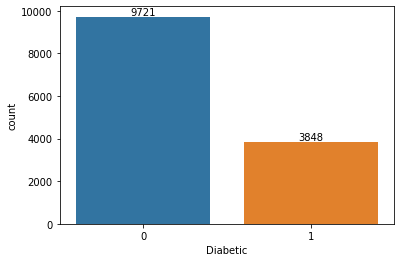

In [33]:
ax = sns.countplot(x = df_diabetes['Diabetic'], order=df_diabetes['Diabetic'].value_counts(ascending=False).index);
abs_values = df_diabetes['Diabetic'].value_counts(ascending=False).values;
ax.bar_label(container=ax.containers[0], labels=abs_values);

### 3.7.1 Removendo Valores Nulos

In [34]:
colunas = ['Age','TricepsThickness', 'SerumInsulin', 'BMI','DiastolicBloodPressure']

for col in colunas:
    media = df_diabetes.loc[df_diabetes[col]>0,col].mean()
    df_diabetes.loc[df_diabetes[col]==0,col]=media

## 3.7.2 Enriquecimento da Base de Dados

In [35]:
with open('modelo/colesterol.pkl', 'rb') as f:
    model_col = pickle.load(f)

In [36]:
colesterol = model_col.predict(df_diabetes[['Age','BMI','DiastolicBloodPressure']].values)
df_diabetes['colesterol'] = colesterol

In [37]:
df_diabetes = df_diabetes[['Pregnancies', 'PlasmaGlucose', 'DiastolicBloodPressure',
       'TricepsThickness', 'SerumInsulin', 'BMI', 'DiabetesPedigree', 'Age','colesterol',
       'Diabetic']]
df_diabetes

,Pregnancies,PlasmaGlucose,DiastolicBloodPressure,TricepsThickness,SerumInsulin,BMI,DiabetesPedigree,Age,colesterol,Diabetic
0,0,171,80.0,34.000000,23.00000,43.509726,1.213191,21.0,184.109969,0
1,8,92,93.0,47.000000,36.00000,21.240576,0.158365,23.0,198.964165,0
2,7,115,47.0,52.000000,35.00000,41.511523,0.079019,23.0,165.152629,0
3,9,103,78.0,25.000000,304.00000,29.582192,1.282870,43.0,200.861074,1
4,1,85,59.0,27.000000,35.00000,42.604536,0.549542,22.0,171.776502,0
...,...,...,...,...,...,...,...,...,...,...
15762,9,89,62.0,28.445837,116.26638,22.500000,0.142000,33.0,185.819705,0
15764,2,122,70.0,27.000000,116.26638,36.800000,0.340000,27.0,183.425682,0
15765,5,121,72.0,23.000000,112.00000,26.200000,0.245000,30.0,189.226097,0
15766,1,126,60.0,28.445837,116.26638,30.100000,0.349000,47.0,192.075303,1


In [38]:
with open('modelo/hba1c.pkl', 'rb') as f:
    model_hba1c = pickle.load(f)

In [39]:
hba1c = model_hba1c.predict(df_diabetes[['Age','BMI','colesterol']].values)

In [40]:
df_diabetes['hba1c']=hba1c
df_diabetes = df_diabetes[['Pregnancies', 'PlasmaGlucose', 'DiastolicBloodPressure',
       'TricepsThickness', 'SerumInsulin', 'BMI', 'DiabetesPedigree', 'Age','colesterol','hba1c',
       'Diabetic']]
df_diabetes

,Pregnancies,PlasmaGlucose,DiastolicBloodPressure,TricepsThickness,SerumInsulin,BMI,DiabetesPedigree,Age,colesterol,hba1c,Diabetic
0,0,171,80.0,34.000000,23.00000,43.509726,1.213191,21.0,184.109969,7.376296,0
1,8,92,93.0,47.000000,36.00000,21.240576,0.158365,23.0,198.964165,4.576920,0
2,7,115,47.0,52.000000,35.00000,41.511523,0.079019,23.0,165.152629,7.269551,0
3,9,103,78.0,25.000000,304.00000,29.582192,1.282870,43.0,200.861074,7.357611,1
4,1,85,59.0,27.000000,35.00000,42.604536,0.549542,22.0,171.776502,7.334428,0
...,...,...,...,...,...,...,...,...,...,...,...
15762,9,89,62.0,28.445837,116.26638,22.500000,0.142000,33.0,185.819705,5.573726,0
15764,2,122,70.0,27.000000,116.26638,36.800000,0.340000,27.0,183.425682,6.980850,0
15765,5,121,72.0,23.000000,112.00000,26.200000,0.245000,30.0,189.226097,5.818603,0
15766,1,126,60.0,28.445837,116.26638,30.100000,0.349000,47.0,192.075303,7.756938,1


##  3.8. Divisão entre previsores, classe

In [41]:
###Divisão dos atributos previsores
X_diabetes = df_diabetes.iloc[:,0:10].values
###criando a classe 
y_diabetes = df_diabetes.iloc[:,10].values
X_diabetes

array([[  0.        , 171.        ,  80.        , ...,  21.        ,
        184.1099693 ,   7.37629612],
       [  8.        ,  92.        ,  93.        , ...,  23.        ,
        198.96416518,   4.57691974],
       [  7.        , 115.        ,  47.        , ...,  23.        ,
        165.15262949,   7.26955141],
       ...,
       [  5.        , 121.        ,  72.        , ...,  30.        ,
        189.22609674,   5.81860307],
       [  1.        , 126.        ,  60.        , ...,  47.        ,
        192.07530297,   7.75693796],
       [  1.        ,  93.        ,  70.        , ...,  23.        ,
        182.29237286,   5.79308354]])

## 3.9. Escalonamento dos atributos

In [42]:
padrao_diabetes =  StandardScaler()
X_diabetes = padrao_diabetes.fit_transform(X_diabetes)

## 3.10. Divisão Bases de treinamento e teste

In [43]:
x_treinamento, x_teste, y_treinamento, y_teste = train_test_split(X_diabetes, y_diabetes, \
                                                                  test_size=0.25,random_state=0)

In [44]:
x_treinamento.shape,y_treinamento.shape

((10176, 10), (10176,))

In [45]:
x_teste.shape,y_teste.shape

((3393, 10), (3393,))

##  3.11. Salvando os dados.

In [46]:
# with open('database/diabetes.pkl',mode='wb') as f:
#      pickle.dump([x_treinamento,y_treinamento,x_teste,y_teste],f)

# 4. Análise e Exploração dos Dados

### Verificação de dados repetidos.

In [47]:
df_diabetes[df_diabetes[['PlasmaGlucose','DiastolicBloodPressure','TricepsThickness', 'SerumInsulin', \
                         'BMI', 'DiabetesPedigree','colesterol','hba1c']].duplicated() == True]

,Pregnancies,PlasmaGlucose,DiastolicBloodPressure,TricepsThickness,SerumInsulin,BMI,DiabetesPedigree,Age,colesterol,hba1c,Diabetic


## 4.2. Buscando uma correlação entre os Dados

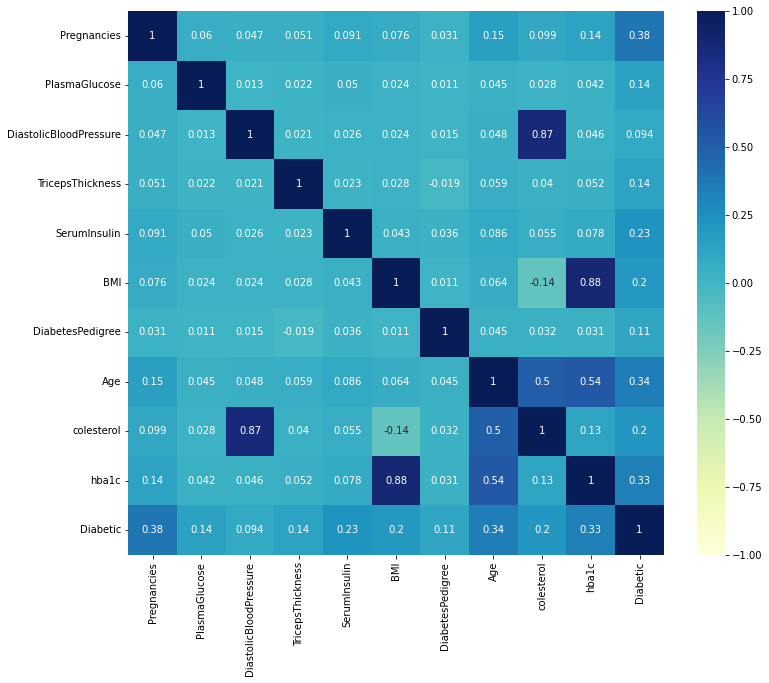

In [48]:
correlacao = df_diabetes.corr(method='pearson')
plt.figure(figsize=(12, 10))
sns.heatmap(correlacao, annot=True, vmin=-1, vmax=1,cmap="YlGnBu")
plt.show()

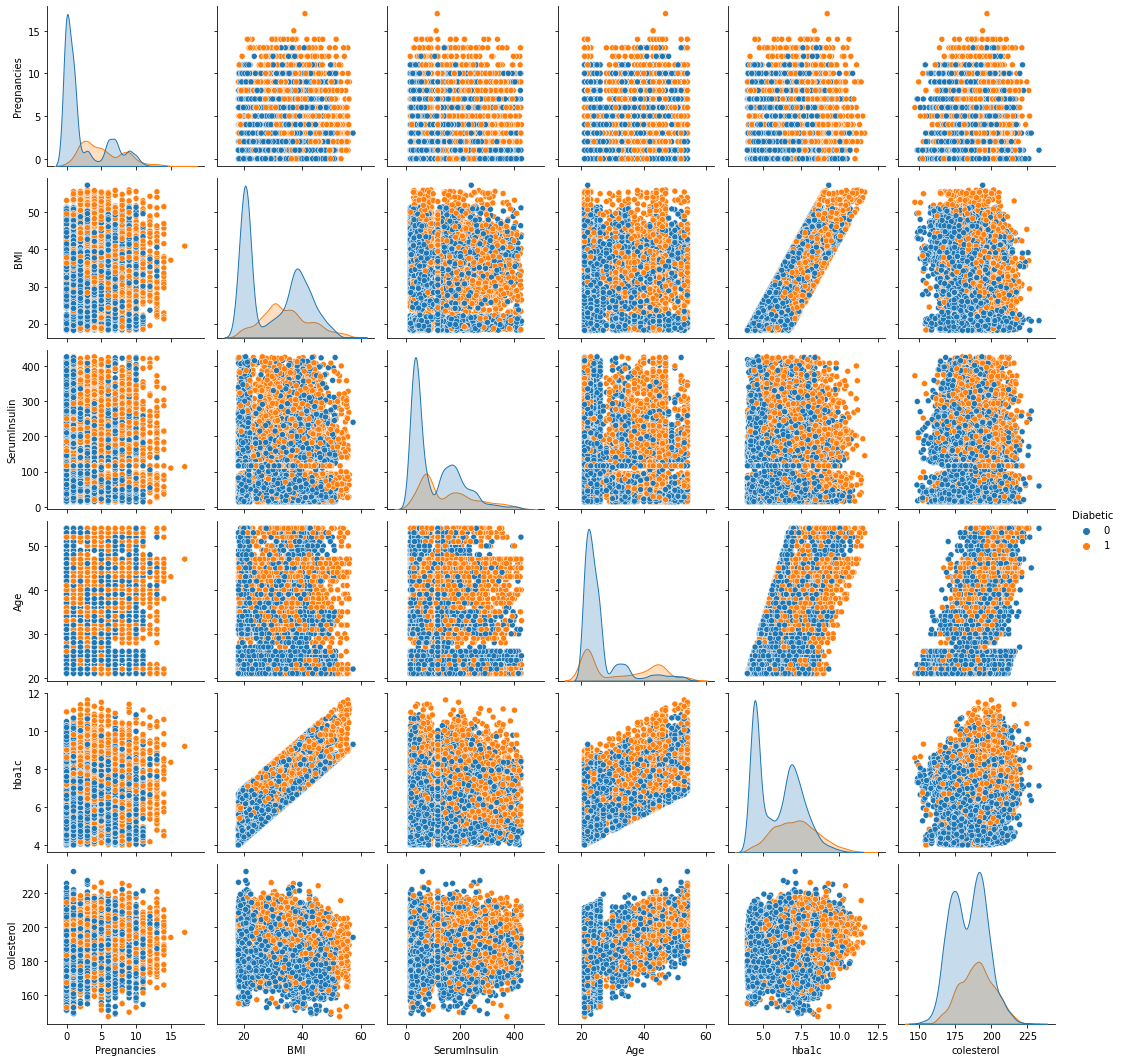

In [49]:
sns.pairplot(data=df_diabetes[['Pregnancies','BMI','SerumInsulin','Age','hba1c','colesterol','Diabetic']],hue='Diabetic')
plt.show()

## Calculo de Coeficiente de Determinação 


In [50]:
valores = df_diabetes.corr(method='pearson').values[:,10]
colunas = df_diabetes.columns
for val,col in zip(valores,colunas):
    display(Markdown(f'Coeficiente de Determinação ***{col}*** e ***Diabetic***: ***\
    {math.pow(val,2)*100:.2f} %***')) 


Coeficiente de Determinação ***Pregnancies*** e ***Diabetic***: ***    14.67 %***

Coeficiente de Determinação ***PlasmaGlucose*** e ***Diabetic***: ***    2.03 %***

Coeficiente de Determinação ***DiastolicBloodPressure*** e ***Diabetic***: ***    0.88 %***

Coeficiente de Determinação ***TricepsThickness*** e ***Diabetic***: ***    1.87 %***

Coeficiente de Determinação ***SerumInsulin*** e ***Diabetic***: ***    5.41 %***

Coeficiente de Determinação ***BMI*** e ***Diabetic***: ***    4.03 %***

Coeficiente de Determinação ***DiabetesPedigree*** e ***Diabetic***: ***    1.28 %***

Coeficiente de Determinação ***Age*** e ***Diabetic***: ***    11.61 %***

Coeficiente de Determinação ***colesterol*** e ***Diabetic***: ***    4.14 %***

Coeficiente de Determinação ***hba1c*** e ***Diabetic***: ***    11.17 %***

Coeficiente de Determinação ***Diabetic*** e ***Diabetic***: ***    100.00 %***

# 4.3. Teste de Hipótese para o conjunto dos dados

## H0 : Os dados seguem uma distribuição Normal
## H1 : Os dados não segue uma distribuição Normal

In [51]:
alpha = 5e-2# 0.05
colunas =df_diabetes.columns[0:9]

for col in colunas:
    stat_teste, p_valor = normaltest(df_diabetes[col]);
    if p_valor < alpha:  # hipótese nula: x vem de uma distribuição normal
        print("Distribuição não normal")
        print(f"A hipótese nula pode ser rejeitada para {col}")
    else:
        print("Distribuição normal")
        print(f"A hipótese nula não pode ser rejeitada para {col}")
    print('')

Distribuição não normal
A hipótese nula pode ser rejeitada para Pregnancies

Distribuição não normal
A hipótese nula pode ser rejeitada para PlasmaGlucose

Distribuição não normal
A hipótese nula pode ser rejeitada para DiastolicBloodPressure

Distribuição não normal
A hipótese nula pode ser rejeitada para TricepsThickness

Distribuição não normal
A hipótese nula pode ser rejeitada para SerumInsulin

Distribuição não normal
A hipótese nula pode ser rejeitada para BMI

Distribuição não normal
A hipótese nula pode ser rejeitada para DiabetesPedigree

Distribuição não normal
A hipótese nula pode ser rejeitada para Age

Distribuição não normal
A hipótese nula pode ser rejeitada para colesterol



## Determine se o coeficiente de correlação é significativo

### H0 : a correlação não é estatisticamente significativa
### H1 : a correlação é estatisticamente significativa


In [52]:
alpha = 5e-2
colunas =df_diabetes.columns[0:9]
for col in colunas:
    corr,p_valor = pearsonr(df_diabetes[col],df_diabetes['Diabetic'])
    if p_valor <= alpha:
        print(f' P-Valor: {p_valor:.4f} <= Alpha:{alpha}')
        print(f' A correlação {corr:.4f} entre {col} e Diabetic é estatisticamente significativa ')
    else:
        print(f' P-Valor: {p_valor:.4f} > Alpha:{alpha}')
        print(f' A correlação {corr:.4f} entre {col} e Diabetic não é estatisticamente significativa ')
    print('')

 P-Valor: 0.0000 <= Alpha:0.05
 A correlação 0.3831 entre Pregnancies e Diabetic é estatisticamente significativa 

 P-Valor: 0.0000 <= Alpha:0.05
 A correlação 0.1425 entre PlasmaGlucose e Diabetic é estatisticamente significativa 

 P-Valor: 0.0000 <= Alpha:0.05
 A correlação 0.0936 entre DiastolicBloodPressure e Diabetic é estatisticamente significativa 

 P-Valor: 0.0000 <= Alpha:0.05
 A correlação 0.1368 entre TricepsThickness e Diabetic é estatisticamente significativa 

 P-Valor: 0.0000 <= Alpha:0.05
 A correlação 0.2327 entre SerumInsulin e Diabetic é estatisticamente significativa 

 P-Valor: 0.0000 <= Alpha:0.05
 A correlação 0.2007 entre BMI e Diabetic é estatisticamente significativa 

 P-Valor: 0.0000 <= Alpha:0.05
 A correlação 0.1130 entre DiabetesPedigree e Diabetic é estatisticamente significativa 

 P-Valor: 0.0000 <= Alpha:0.05
 A correlação 0.3408 entre Age e Diabetic é estatisticamente significativa 

 P-Valor: 0.0000 <= Alpha:0.05
 A correlação 0.2036 entre colest

# 5. Criação de Modelos de Machine Learning

##### Para o presente estudo de uma busca pelo melhor modelo de Machine Leaning que se adequa a nossa necessidade excutaremos em notebook's diferente cada modelo e salvaremos aqui apenas uma Tabela de Comparação entre modelos.

**5.1. Aprendizagem Bayesiana**

Notebook:**Aprendizagem_Bayesiana.ipynb**

**5.2.Arvores_Decisao e RandomForestClassifier**

Notebook:**Arvores_Decisao_RandomForestClassifier.ipynb**

**5.3.Support-Vector Machine**

Notebook:**VectorMachine.ipynb.ipynb**

Após a criação de cada modelo em seus respectivos notebook's faremos a carga e a analise de cada um

# 6. Interpretação dos Resultados

## Carga dos modelos

In [53]:
with open('modelo/naiveGaussian_model.pkl', 'rb') as f:
    model_naiveG = pickle.load(f)
with open('modelo/naiveBernoulli_model.pkl', 'rb') as f:
    model_naiveB = pickle.load(f)
with open('modelo/arvore_model.pkl', 'rb') as f:
    model_TreeCL = pickle.load(f)
with open('modelo/randomforest_model.pkl', 'rb') as f:
    model_randomForest = pickle.load(f)
with open('modelo/svm_model.pkl', 'rb') as f:
    model_svm = pickle.load(f)

In [54]:
# valores de resultado para 300 testes
resultado_naive_bayes_Gaussian = []
resultado_naive_bayes_Bernolli = []
resultado_arvore = []
resultado_random_forest = []
resultado_svm = []

In [73]:

# #Naive Bayes Gaussian
# for i in range(30):
#     kfold = KFold(n_splits=10,shuffle=True,random_state=i)
#     scores_1 = cross_val_score(model_naiveG,x_treinamento,y_treinamento,cv = kfold)
#     resultado_naive_bayes_Gaussian.append(scores_1.mean())
# print(f'naive_bayes_Gaussian: {len(resultado_naive_bayes_Gaussian)}')
# #Naive Bayes Bernolli
# for i in range(30):
#     kfold = KFold(n_splits=10,shuffle=True,random_state=i)
#     scores_2 = cross_val_score(model_naiveB,x_treinamento,y_treinamento,cv = kfold)
#     resultado_naive_bayes_Bernolli.append(scores_2.mean())
# print(f'naive_bayes_Bernolli: {len(resultado_naive_bayes_Bernolli)}')

#Arvore Classifier
# for i in range(30):
#     kfold = KFold(n_splits=10,shuffle=True,random_state=i)
#     scores_3 = cross_val_score(model_TreeCL,x_treinamento,y_treinamento,cv = kfold)
#     resultado_arvore.append(scores_3.mean())
# print(f'Arvore: {len(resultado_arvore)}')
# #Random Forest
# for i in range(30):
#     kfold = KFold(n_splits=10,shuffle=True,random_state=i)
#     scores_4 = cross_val_score(model_randomForest,x_treinamento,y_treinamento,cv = kfold)
#     resultado_random_forest.append(scores_4.mean())
# print(f'random_forest: {len(resultado_random_forest)}')
# #SVM
# for i in range(30):
#     kfold = KFold(n_splits=10,shuffle=True,random_state=i)
#     scores_5 = cross_val_score(model_svm,x_treinamento,y_treinamento,cv = kfold)
#     resultado_svm.append(scores_5.mean())
# print(f'SVM: {len(resultado_svm)}')
resultados = pd.DataFrame({'Naive Bayes Gaussian':resultado_naive_bayes_Gaussian,
                           'Naive Bayes Bernolli': resultado_naive_bayes_Bernolli,
                           'Decision Tree Classifier':resultado_arvore,
                           'Random Forest':resultado_random_forest,
                           'Support Vector Machine':resultado_svm
                           })

In [112]:
#optou-se pela gravação do modelo para evitar a execução das validações cruzada devido ao custo de processamento
# isso não influencia no resultado
# with open('modelo/model_analise.pkl', 'wb') as file:
#     pickle.dump(resultados, file)
with open('modelo/model_analise.pkl', 'rb') as file:
    resultados = pickle.load(file)

In [113]:
resultados.head()

,Naive Bayes Gaussian,Naive Bayes Bernolli,Decision Tree Classifier,Random Forest,Support Vector Machine
0,0.793826,0.776137,0.895047,0.920006,0.880897
1,0.794224,0.775453,0.898192,0.919320,0.881781
2,0.794418,0.775650,0.898486,0.918633,0.880699
3,0.795309,0.775457,0.896230,0.918340,0.880508
4,0.794517,0.775846,0.896817,0.916864,0.881290


### Coeficiente de Variação

In [114]:
(resultados.std()/resultados.mean())*100

Naive Bayes Gaussian        0.053319
Naive Bayes Bernolli        0.046628
Decision Tree Classifier    0.198541
Random Forest               0.090011
Support Vector Machine      0.109893
dtype: float64

### 6.1. Normalidade com ANOVA e Teste de significância estatística

### 6.1.1. Teste com o método de Shapiro-Wilk

In [115]:
apha = 5e-2
nomes = ['Naive Bayes Gaussian','Naive Bayes Bernolli','Decision Tree Classifier','Random Forest','Support Vector Machine']
p_valor = []
p_valor.append(shapiro(resultados['Naive Bayes Gaussian'])[1])
p_valor.append(shapiro(resultados['Naive Bayes Bernolli'])[1])
p_valor.append(shapiro(resultados['Decision Tree Classifier'])[1])
p_valor.append(shapiro(resultados['Random Forest'])[1])
p_valor.append(shapiro(resultados['Support Vector Machine'])[1])
# H0 os dados estão em distribuião normal
# H1 os dados não segue estão em distribuião normal
for p,n in zip(p_valor,nomes):
    if p <= alpha:
        print(f'Em {n} p-valor: {p:.2f} <= alpha: {alpha:.2f} os dados não seguem estão em distribuião normal')
    else:
        print(f'Em {n} p-valor: {p:.2f} > alpha: {alpha:.2f} os dados seguem uma distribuião normal')
    print('-'*100)

Em Naive Bayes Gaussian p-valor: 0.77 > alpha: 0.05 os dados seguem uma distribuião normal
----------------------------------------------------------------------------------------------------
Em Naive Bayes Bernolli p-valor: 0.42 > alpha: 0.05 os dados seguem uma distribuião normal
----------------------------------------------------------------------------------------------------
Em Decision Tree Classifier p-valor: 0.28 > alpha: 0.05 os dados seguem uma distribuião normal
----------------------------------------------------------------------------------------------------
Em Random Forest p-valor: 0.62 > alpha: 0.05 os dados seguem uma distribuião normal
----------------------------------------------------------------------------------------------------
Em Support Vector Machine p-valor: 0.47 > alpha: 0.05 os dados seguem uma distribuião normal
----------------------------------------------------------------------------------------------------


In [116]:
resultados.describe()

,Naive Bayes Gaussian,Naive Bayes Bernolli,Decision Tree Classifier,Random Forest,Support Vector Machine
count,30.000000,30.000000,30.000000,30.000000,30.000000
mean,0.794337,0.775476,0.896020,0.918924,0.881797
std,0.000424,0.000362,0.001779,0.000827,0.000969
min,0.793438,0.774469,0.892590,0.916864,0.880112
25%,0.794025,0.775279,0.895046,0.918434,0.881093
50%,0.794369,0.775456,0.895931,0.918779,0.881682
75%,0.794517,0.775653,0.897357,0.919590,0.882567
max,0.795309,0.776140,0.898683,0.920502,0.884434


In [125]:
algoritmos=[]
n1 = ['Naive Bayes Gaussian']*30
n2 = ['Naive Bayes Bernolli']*30
n3 = ['Decision Tree Classifier']*30
n4 = ['Random Forest']*30
n5 = ['Support Vector Machine']*30
algoritmos = n1+n2+n3+n4+n5
nbg = resultados['Naive Bayes Gaussian'].values
nbb = resultados['Naive Bayes Bernolli'].values
dtc = resultados['Decision Tree Classifier'].values
rf = resultados['Random Forest'].values
svm = resultados['Support Vector Machine'].values

### 6.1.2 A análise de variância (ANOVA) e Diferença estatística significativa 

In [133]:
alpha=5e-2
_, p = f_oneway(nbg,nbb,dtc,rf,svm)

if p <= alpha:
    print(f'Em p-valor: {p:.2f} <= alpha: {alpha:.2f} Hipotese nula rejeitada,os dados são diferentes ')
else:
    print(f'Em p-valor: {p:.2f} > alpha: {alpha:.2f} Hipotese alternativa rejeitada,os dados iguais')

Em p-valor: 0.00 <= alpha: 0.05 Hipotese nula rejeitada,os dados são diferentes 


## 6.2. Teste de Tukey	

In [135]:
resultados_algoritmos ={
    'algoritmos':algoritmos,
    'accuracy':np.concatenate([nbg,nbb,dtc,rf,svm]
                              ,axis=None),
}

In [97]:
resultados_algoritmos_df = pd.DataFrame(resultados_algoritmos)
resultados_algoritmos_df

,algoritmos,accuracy
0,Naive Bayes Gaussian,0.793826
1,Naive Bayes Gaussian,0.794224
2,Naive Bayes Gaussian,0.794418
3,Naive Bayes Gaussian,0.795309
4,Naive Bayes Gaussian,0.794517
...,...,...
145,Support Vector Machine,0.880697
146,Support Vector Machine,0.881093
147,Support Vector Machine,0.882370
148,Support Vector Machine,0.881094


In [138]:
compara_algoritmos = MultiComparison(resultados_algoritmos_df['accuracy'],\
                                     resultados_algoritmos_df['algoritmos'])
testes_estatistico = compara_algoritmos.tukeyhsd()

In [137]:
print(testes_estatistico)

                 Multiple Comparison of Means - Tukey HSD, FWER=0.05                 
         group1                  group2         meandiff p-adj  lower   upper  reject
-------------------------------------------------------------------------------------
Decision Tree Classifier   Naive Bayes Bernolli  -0.1205 0.001 -0.1213 -0.1198   True
Decision Tree Classifier   Naive Bayes Gaussian  -0.1017 0.001 -0.1024  -0.101   True
Decision Tree Classifier          Random Forest   0.0229 0.001  0.0222  0.0236   True
Decision Tree Classifier Support Vector Machine  -0.0142 0.001 -0.0149 -0.0135   True
    Naive Bayes Bernolli   Naive Bayes Gaussian   0.0189 0.001  0.0181  0.0196   True
    Naive Bayes Bernolli          Random Forest   0.1434 0.001  0.1427  0.1442   True
    Naive Bayes Bernolli Support Vector Machine   0.1063 0.001  0.1056   0.107   True
    Naive Bayes Gaussian          Random Forest   0.1246 0.001  0.1239  0.1253   True
    Naive Bayes Gaussian Support Vector Machine   0.08

In [139]:
resultados.mean()

Naive Bayes Gaussian        0.794337
Naive Bayes Bernolli        0.775476
Decision Tree Classifier    0.896020
Random Forest               0.918924
Support Vector Machine      0.881797
dtype: float64

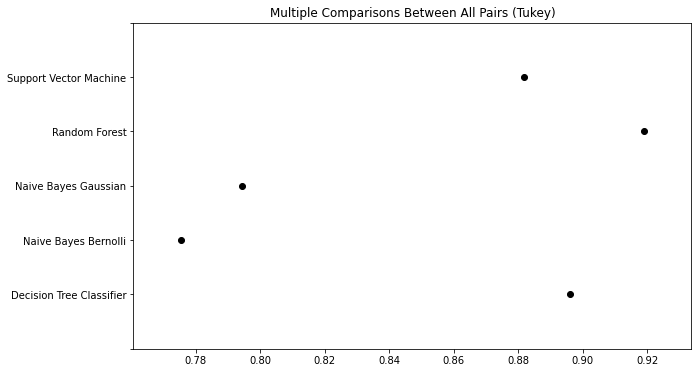

In [100]:
testes_estatistico.plot_simultaneous();